<h1><center>Predictive Alarms for Refrigerators in UK</h1>

## Authors:
- Alan Stiven Camacho Restrepo
- Jorge Luis David Mesa
- Juan Pablo Ortiz Gil



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the data set
df = pd.read_csv("CPT_PREDICTIVE_PPM.csv", encoding='windows-1252')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,12,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<h2><b>1. Data visualization</b></h2>

In [ ]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap

In [ ]:
# This code make a heat visualization of alarmas in UK, THIS CODE TAKES A LONG TIME OF RUNNING AND EVEN CAN MAKE COLAB COLLAPSE. 
# PLEASE DO NOT RUN THIS PART OF THE CODE. IF YOU WANT TO SEE THE RESULTS PLEASE REFER TO DOCUMENT map.html.

In [ ]:
geolocator = Nominatim(user_agent="specify_your_app_name_here")

In [ ]:
n = len(df["Site Zipcode"])

In [ ]:
def f(s):
  if geolocator.geocode({"postalcode":s}) == None:
    return (0,0)
  else :
    return geolocator.geocode({"postalcode":s})[1] 

In [ ]:
Z = df["Site Zipcode"]
M= df.groupby("Site Zipcode")["Site Zipcode"].count()
N = np.array(M)
Z = np.sort(Z.unique())

In [ ]:
L = [f(i) for i in Z]

In [ ]:
df1 = pd.DataFrame({"Coordinates":list(L)})
df1["Porcentage"] = list(N/n)

In [ ]:
np.savetxt('datos2.txt', L)

In [ ]:
L1 = np.loadtxt("datos2.txt")
L1

In [ ]:
# extracting longitude and latitude values to separate lists
longs = [L1[i][1] for i in range(len(L1))]
lats = [L1[i][0] for i in range(len(L1))]
# calculating mean longitude and latitude values
import statistics
meanLong = statistics.mean(longs)
meanLat = statistics.mean(lats)
# create base map object using Map()
mapObj = folium.Map(location=[meanLat, meanLong], zoom_start = 14.5)
# create heatmap layer
heatmap = HeatMap( list(zip(lats, longs, df1["Porcentage"])),
                   min_opacity=0.2,
                   max_val=df1["Porcentage"].max(),
                   radius=50, blur=50, 
                   max_zoom=1)
# add heatmap layer to base map
heatmap.add_to(mapObj)
mapObj

In [ ]:
mapObj.save(outfile= "map.html")

<h2><b>2. Data inspection</b></h2>

In [ ]:
# Shape of the DataFrame
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 609989
Number of columns: 20


In [ ]:
# Columns' names
print(df.columns)

Index(['Work Order Number', 'Site Number', 'Site Type', 'Date Created',
       'Date Completed', 'Provider Name', 'WO Current Status',
       'Asset Category', 'Problem Type Name', 'Requested By', 'WO Priority',
       'Manufacturer', 'Asset In-Service Date', 'Level 1 Organization Name',
       'Site Zipcode', 'Sales Sq. Ft.', 'Asset Barcode', 'Client Product Name',
       'Asset Type', 'Asset Status'],
      dtype='object')


In [ ]:
df['Problem Type Name'].unique()

array(['Fixture Critical Over Temperature Alarm',
       'Fixture Critical Under Temperature Alarm',
       'Fixture Critical Alarm', ...,
       'KB - Case Maintenance - Period 8 - Contractual Diligence Visit 4',
       'KB - Case Maintenance - Period 8 - Contractual Diligence Visit 5',
       'Refrigeration Leak Detection Devices'], dtype=object)

In [ ]:
df.head()

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 10:00,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567391,Frozen Food (-18C or less),HALF GLASS DOOR & WELL,In Service
1,12904685,A0892,SUPERMARKET,01/02/2012 03:05,01/02/2012 09:59,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567398,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
2,12904853,A0892,SUPERMARKET,01/02/2012 05:10,01/02/2012 10:01,Space Engineering services LTD,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,CARTER,01/06/2011 15:19,Region N10,DN31 1UF,42639.0,SSL00567399,Frozen Food (-18C or less),FULL GLASS DOOR,In Service
3,12927899,A0416,SUPERMARKET,01/02/2012 08:40,02/02/2012 13:03,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,LINDE,01/08/2002 05:00,Region S01,BR4 0PU,13423.0,SSL00225160,"Meat, Fish and Poultry (3C or less)",REMOTE MULTIDECK,In Service
4,12932231,A0003,SUPERMARKET,01/02/2012 13:33,08/02/2012 19:39,CMS Solutions Limited,EOL,REFRIGERATION,Fixture Critical Over Temperature Alarm,Urgent Refrigeration Alarm,Standard SLA,RADFORD RETAIL SYSTEMS,15/03/2009 04:00,Region S02,DA11 8JH,37870.0,SSL00583503,NaN,FULL GLASS DOOR,Scrapped


# Description of each feature

* "Work Order Number": número de identifiación de la operación
* "Site Number": número de identifiación del supermercado
* "Site Type": Tipo de tienda o compañia; Supermarket(big) - Convenience(small)
* "Date Created": Fecha y hora en que la alarma se disparó
* "Date Completed": Fecha y hora en que la alarma se silenció
* "Provider Name": Nombre de la compañia de mantenimiento
* "WO Current Status": 
* "Asset Category": Tipo de activo (Refrigerador, aire acondicionado, luz, etc)
* "Problem Type Name": Tipo de alarma (Por qué se prendió la alarma)
* "Requested By": Compañia quién solicita la ayuda
* "WO Priority": 
* "Manufacturer": Fabricante
* "Asset In-Service Date": Fecha y hora cuando se conectó por primera vez el activo
* "Level 1 Organization Name": Región en la cual fue dividida
* "Site Zipcode": Código postal de la tienda
* "Sales Sq. Ft.": Tamaño de la tienda en pies cuadrados
* "Asset Barcode": Código de barras del activo
* "Client Product Name": Nombre del producto del cliente
* "Asset Type": Tipo de activo
* "Asset Status": Estado del activo. Inactivo o Activo - hora de generar el conjunto de datos


In [ ]:
# Types of the elements of each column, nulls and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609989 entries, 0 to 609988
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Work Order Number          609989 non-null  int64  
 1   Site Number                609989 non-null  object 
 2   Site Type                  609989 non-null  object 
 3   Date Created               609989 non-null  object 
 4   Date Completed             577602 non-null  object 
 5   Provider Name              609989 non-null  object 
 6   WO Current Status          609989 non-null  object 
 7   Asset Category             609989 non-null  object 
 8   Problem Type Name          609989 non-null  object 
 9   Requested By               527644 non-null  object 
 10  WO Priority                609989 non-null  object 
 11  Manufacturer               609989 non-null  object 
 12  Asset In-Service Date      506751 non-null  object 
 13  Level 1 Organization Name  60

In [ ]:
# Lower case for strings in the DataFrame 
for col in df.columns:
    try:
        df[col] = df[col].str.lower()
    except:
        pass

In [ ]:
df.head()

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status
0,12904684,a0892,supermarket,01/02/2012 03:05,01/02/2012 10:00,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567391,frozen food (-18c or less),half glass door & well,in service
1,12904685,a0892,supermarket,01/02/2012 03:05,01/02/2012 09:59,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567398,frozen food (-18c or less),full glass door,in service
2,12904853,a0892,supermarket,01/02/2012 05:10,01/02/2012 10:01,space engineering services ltd,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,carter,01/06/2011 15:19,region n10,dn31 1uf,42639.0,ssl00567399,frozen food (-18c or less),full glass door,in service
3,12927899,a0416,supermarket,01/02/2012 08:40,02/02/2012 13:03,cms solutions limited,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,linde,01/08/2002 05:00,region s01,br4 0pu,13423.0,ssl00225160,"meat, fish and poultry (3c or less)",remote multideck,in service
4,12932231,a0003,supermarket,01/02/2012 13:33,08/02/2012 19:39,cms solutions limited,eol,refrigeration,fixture critical over temperature alarm,urgent refrigeration alarm,standard sla,radford retail systems,15/03/2009 04:00,region s02,da11 8jh,37870.0,ssl00583503,NaN,full glass door,scrapped


In [ ]:
# There aren't duplicate rows
df[df.duplicated(keep=False)]

,Work Order Number,Site Number,Site Type,Date Created,Date Completed,Provider Name,WO Current Status,Asset Category,Problem Type Name,Requested By,WO Priority,Manufacturer,Asset In-Service Date,Level 1 Organization Name,Site Zipcode,Sales Sq. Ft.,Asset Barcode,Client Product Name,Asset Type,Asset Status


In [ ]:
# There aren't duplicated columns
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
# Replacing with NaN values if there are any of the symbols "?" and "" 
df = df.replace(r"?", np.nan)
df = df.replace(r"", np.nan)

In [ ]:
# Number of nulls for each column
df.isnull().sum()

Work Order Number                 0
Site Number                       0
Site Type                         0
Date Created                      0
Date Completed                32387
Provider Name                     0
WO Current Status                 0
Asset Category                    0
Problem Type Name                 0
Requested By                  82345
WO Priority                       0
Manufacturer                      0
Asset In-Service Date        103238
Level 1 Organization Name         0
Site Zipcode                      0
Sales Sq. Ft.                129538
Asset Barcode                     0
Client Product Name          142080
Asset Type                    82345
Asset Status                  83984
dtype: int64

In [ ]:
# Total number of nulls or NaN values in the DataFrame
df.isnull().sum().sum()

655917

In [ ]:
# There are just two columns with continue (numerical) variables  
df.describe()

,Work Order Number,Sales Sq. Ft.
count,6.099890e+05,480451.000000
mean,2.258053e+07,33424.599678
std,5.329274e+06,17510.817320
min,1.290468e+07,868.000000
25%,1.889841e+07,21863.000000
50%,2.214566e+07,35011.000000
75%,2.693373e+07,45570.000000
max,3.270445e+07,87176.000000


In [ ]:
# Converting the datatimes columns to a pandas datetime object
times_columns = ['Date Created', 'Date Completed', 'Asset In-Service Date']
for column in times_columns:
  df[column] = pd.to_datetime(df[column], format='%d/%m/%Y %H:%M')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609989 entries, 0 to 609988
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Work Order Number          609989 non-null  int64         
 1   Site Number                609989 non-null  object        
 2   Site Type                  609989 non-null  object        
 3   Date Created               609989 non-null  datetime64[ns]
 4   Date Completed             577602 non-null  datetime64[ns]
 5   Provider Name              609989 non-null  object        
 6   WO Current Status          609989 non-null  object        
 7   Asset Category             609989 non-null  object        
 8   Problem Type Name          609989 non-null  object        
 9   Requested By               527644 non-null  object        
 10  WO Priority                609989 non-null  object        
 11  Manufacturer               609989 non-null  object  

## Regression analisys

In [ ]:
dff = df.copy()

In [ ]:
# Dropping non-contributing features to regression
dff = dff.drop(['Work Order Number', 'Date Completed', 'WO Current Status', 'Asset Category', 'Problem Type Name', 'Requested By', 'WO Priority',  \
                   'Manufacturer', 'Asset In-Service Date', 'Level 1 Organization Name', 'Asset Barcode', 'Client Product Name', \
                   'Asset Type', 'Asset Status'], axis=1)

In [ ]:
# Getting year and month in new columns
dff['year'] = dff['Date Created'].apply(lambda t: t.year)
dff['month'] = dff['Date Created'].apply(lambda t: t.month)

# Drop Data created column
dff = dff.drop(['Date Created'], axis=1)

In [ ]:
dff

,Site Number,Site Type,Provider Name,Site Zipcode,Sales Sq. Ft.,year,month
0,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
1,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
2,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
3,a0416,supermarket,cms solutions limited,br4 0pu,13423.0,2012,2
4,a0003,supermarket,cms solutions limited,da11 8jh,37870.0,2012,2
...,...,...,...,...,...,...,...
609984,a4994,convenience store,space engineering services ltd,cv22 5ez,NaN,2015,9
609985,a4542,convenience store,space engineering services ltd,bs21 7ph,NaN,2015,9
609986,a4357,convenience store,space engineering services ltd,wv3 9qz,NaN,2015,9
609987,a4719,convenience store,carter refrigeration,ls25 1ds,1547.0,2015,9


In [ ]:
# All nulls belong to Sales Sq. Ft. column
dff.isna().sum()

Site Number           0
Site Type             0
Provider Name         0
Site Zipcode          0
Sales Sq. Ft.    129538
year                  0
month                 0
dtype: int64

In [ ]:
dff = dff.fillna(0)
dff

,Site Number,Site Type,Provider Name,Site Zipcode,Sales Sq. Ft.,year,month
0,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
1,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
2,a0892,supermarket,space engineering services ltd,dn31 1uf,42639.0,2012,2
3,a0416,supermarket,cms solutions limited,br4 0pu,13423.0,2012,2
4,a0003,supermarket,cms solutions limited,da11 8jh,37870.0,2012,2
...,...,...,...,...,...,...,...
609984,a4994,convenience store,space engineering services ltd,cv22 5ez,0.0,2015,9
609985,a4542,convenience store,space engineering services ltd,bs21 7ph,0.0,2015,9
609986,a4357,convenience store,space engineering services ltd,wv3 9qz,0.0,2015,9
609987,a4719,convenience store,carter refrigeration,ls25 1ds,1547.0,2015,9


In [ ]:
# Grouping number of alarms for every feature
d = dff.groupby(['Site Number','Site Zipcode','Sales Sq. Ft.','Site Type','year', 'month', 'Provider Name']).year.count()
d

Site Number  Site Zipcode  Sales Sq. Ft.  Site Type    year  month  Provider Name        
a0002        e15 1xe       11846.0        supermarket  2012  2      cms solutions limited     7
                                                             3      cms solutions limited     8
                                                             4      cms solutions limited    12
                                                             5      cms solutions limited     7
                                                             6      cms solutions limited    10
                                                                                             ..
p2835        bl3 6dh       0.0            pfs          2014  8      cbes                      5
                                                             9      cbes                      1
                                                             10     cbes                      3
                                              

In [ ]:
# Create lists with the feature plus number of alarms
myList = []
for i in range(len(d)):
  a = list(d.index[i])
  a.append(d[i])
  myList.append(a)

In [ ]:
# Create the DataFrame with number of alarms
df_alarms = pd.DataFrame(myList, columns = ['Site Number', 'Site Zipcode', 'Sales Sq. Ft.','Site Type','Year','Month', 'Provider Name', 'Number of Alarms'])

In [ ]:
df_alarms

,Site Number,Site Zipcode,Sales Sq. Ft.,Site Type,Year,Month,Provider Name,Number of Alarms
0,a0002,e15 1xe,11846.0,supermarket,2012,2,cms solutions limited,7
1,a0002,e15 1xe,11846.0,supermarket,2012,3,cms solutions limited,8
2,a0002,e15 1xe,11846.0,supermarket,2012,4,cms solutions limited,12
3,a0002,e15 1xe,11846.0,supermarket,2012,5,cms solutions limited,7
4,a0002,e15 1xe,11846.0,supermarket,2012,6,cms solutions limited,10
...,...,...,...,...,...,...,...,...
57658,p2835,bl3 6dh,0.0,pfs,2014,8,cbes,5
57659,p2835,bl3 6dh,0.0,pfs,2014,9,cbes,1
57660,p2835,bl3 6dh,0.0,pfs,2014,10,cbes,3
57661,p2835,bl3 6dh,0.0,pfs,2014,11,cbes,1


# First model with the filtered data

In [ ]:
from sklearn.utils import shuffle
df_alarms = shuffle(df_alarms)

In [ ]:
# Features matrix
X = df_alarms.drop(columns=['Number of Alarms'])

# Target values
y = df_alarms[['Number of Alarms']]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Treatment for categorical and numerical variables
num_imputer = SimpleImputer()
scale = StandardScaler()
cat_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

num_tra = make_pipeline(num_imputer, scale)
num_n_tra = make_pipeline(num_imputer)
cat_tra = make_pipeline(cat_imputer,ohe)
cat_n_tra = make_pipeline(cat_imputer)

In [ ]:
from sklearn.compose import make_column_transformer

# Preprocessing of features
num_cols = ['Sales Sq. Ft.']
num_n_cols = ['Year', 'Month']
cat_cols = ['Site Number','Site Zipcode', 'Site Type','Provider Name']
cat_n_cols = []

preprocessor = make_column_transformer((num_tra, num_cols),
                                       (cat_tra, cat_cols),
                                       (num_n_tra, num_n_cols),
                                       (cat_n_tra, cat_n_cols))

In [ ]:
X_trans = preprocessor.fit_transform(X)

In [ ]:
from sklearn.linear_model import Ridge
# Load the ridge (lineal) model
clf = Ridge(alpha=1)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_trans ,y ,test_size = 0.25, random_state= 42 )

clf.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
clf.score(X_train,y_train)

0.35654558140453174

In [ ]:
clf.score(X_test,y_test)

0.3248512502692297

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
# Alpha parameters optimization with GridSearch
model = Ridge()
grid = dict()
grid['alpha'] = np.arange(0.9,1.01,0.01)
search = GridSearchCV(model,grid,scoring='neg_mean_absolute_error', n_jobs=None)
results = search.fit(X_train, y_train)
print('Config: %s' % results.best_params_)

# Second model

In [ ]:
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
years = [2012, 2013, 2014, 2015]

In [ ]:
TOTAL = df_alarms.copy()

In [ ]:
# Llenando los datos faltantes del numero de alarmas entre los años 2012-2015 (años y meses)

for col in df_alarms['Site Number'].unique():
  df1 = df_alarms[df_alarms['Site Number'] == col]
  df1_ref = df1.drop(['Year', 'Month', 'Number of Alarms'], axis=1)
  dic = {col_name: df1[col_name].unique()[0] for col_name in df1_ref.columns}

  for year in years:
    if year not in df1['Year'].unique():
      dic['Year'] = [year]
      dic['Month'] = [1]
      dic['Number of Alarms'] = [0]
      df_ = pd.DataFrame(dic)
      TOTAL = pd.concat([TOTAL, df_])

    for month in months:
      if month not in df1[df1['Year'] == year]['Month'].unique():
        dic['Year'] = [year]
        dic['Month'] = [month]
        dic['Number of Alarms'] = [0]
        df_ = pd.DataFrame(dic)
        TOTAL = pd.concat([TOTAL, df_])
    

In [ ]:
TOTAL.shape

(88312, 8)

In [ ]:
Tot = TOTAL[~((TOTAL['Year']==2012) & (TOTAL['Month'] == 1))]

In [ ]:
df2_alarms = Tot[~((Tot['Year']==2015) & (Tot['Month'] > 11))]

In [ ]:
df2_alarms.shape

(84697, 8)

In [ ]:
df_regr1 = df2_alarms.reset_index(drop=True)

# Standarization and ONE HOT ENCODING

In [ ]:
# Resample randomly the dataframe registers
from sklearn.utils import shuffle
df_regr1 = shuffle(df_regr1)

In [ ]:
# Features matrix
X = df_regr1.drop(columns=['Number of Alarms'])
# Target column
y = df_regr1[['Number of Alarms']]

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_imputer = SimpleImputer()
scale = StandardScaler()
cat_imputer = SimpleImputer(strategy='most_frequent')
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

num_tra = make_pipeline(num_imputer, scale)
num_n_tra = make_pipeline(num_imputer)
cat_tra = make_pipeline(cat_imputer,ohe)
cat_n_tra = make_pipeline(cat_imputer)

In [ ]:
from sklearn.compose import make_column_transformer
num_cols = ['Sales Sq. Ft.']
num_n_cols = ['Year', 'Month']
cat_cols = ['Site Number','Site Zipcode', 'Site Type','Provider Name']
cat_n_cols = []

preprocessor = make_column_transformer((num_tra, num_cols),
                                       (cat_tra, cat_cols),
                                       (num_n_tra, num_n_cols),
                                       (cat_n_tra, cat_n_cols))

In [ ]:
X_trans = preprocessor.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans ,y ,test_size = 0.25, random_state= 42 )

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

LR = LinearRegression()
clf = Ridge(alpha=1)

In [ ]:
clf.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
print(f"Train data score: {clf.score(X_train, y_train)} y test data score: {clf.score(X_test, y_test)}")

Train data score: 0.4040408998484233 y test data score: 0.36190816601724063


# Third model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Create the classifier
clf = RandomForestClassifier(n_estimators=40)

# Training the model
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(n_estimators=40)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Testing accuracy =", accuracy_score(y_test, y_pred))

Testing accuracy = 0.4068004722550177


In [ ]:
clf.score(X_train, y_train)

0.9991499008217626

In [ ]:
clf.score(X_test, y_test)

0.4068004722550177

# One prediction

In [ ]:
df2_alarms[(df2_alarms['Year']==2015) & (df2_alarms['Month'] == 10)]

,Site Number,Site Zipcode,Sales Sq. Ft.,Site Type,Year,Month,Provider Name,Number of Alarms
32334,a2274,cf37 4da,0.0,supermarket,2015,10,space engineering services ltd,19
44807,a4542,bs21 7ph,0.0,convenience store,2015,10,space engineering services ltd,2
2952,a0069,sw18 4ad,41020.0,supermarket,2015,10,cms solutions limited,46
6264,a0500,n1 0rw,30695.0,supermarket,2015,10,cms solutions limited,5
14520,a0735,s80 3at,42206.0,supermarket,2015,10,space engineering services ltd,9
...,...,...,...,...,...,...,...,...
0,a4575,hd9 3ay,0.0,convenience store,2015,10,space engineering services ltd,0
0,a4225,de11 7nd,0.0,convenience store,2015,10,airkool contracts ltd,0
0,p0801,tq4 7pe,0.0,pfs,2015,10,space engineering services ltd,0
0,p2059,de24 8eb,0.0,pfs,2015,10,space engineering services ltd,0


In [ ]:
dicc_pred = {
    'Site Number': ['a0069']*12,
    'Site Zipcode': ['sw18 4ad']*12,
    'Sales Sq. Ft.': [41020.0]*12,
    'Site Type': ['supermarket']*12,
    'Year': [2016]*12,
    'Month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12],
    'Provider Name': ['cms solutions limited']*12
}

In [ ]:
df_pred = pd.DataFrame(dicc_pred)
df_pred

,Site Number,Site Zipcode,Sales Sq. Ft.,Site Type,Year,Month,Provider Name
0,a0069,sw18 4ad,41020.0,supermarket,2016,1,cms solutions limited
1,a0069,sw18 4ad,41020.0,supermarket,2016,2,cms solutions limited
2,a0069,sw18 4ad,41020.0,supermarket,2016,3,cms solutions limited
3,a0069,sw18 4ad,41020.0,supermarket,2016,4,cms solutions limited
4,a0069,sw18 4ad,41020.0,supermarket,2016,5,cms solutions limited
5,a0069,sw18 4ad,41020.0,supermarket,2016,6,cms solutions limited
6,a0069,sw18 4ad,41020.0,supermarket,2016,7,cms solutions limited
7,a0069,sw18 4ad,41020.0,supermarket,2016,8,cms solutions limited
8,a0069,sw18 4ad,41020.0,supermarket,2016,9,cms solutions limited
9,a0069,sw18 4ad,41020.0,supermarket,2016,10,cms solutions limited


In [ ]:
X_pred = preprocessor.transform(df_pred)

In [ ]:
clf.predict(X_pred)

array([39, 25, 52, 52, 58, 63, 88, 88, 83, 46,  0,  0])

# Conclutions

$\bullet$ Out of the three models, the one with the best performance was RandomForestClassifier but it's memorizing the patterns of the training set, i.e it presents overfitting.

$\bullet$ Several Linear Regressions were tested, the one with the best results was the Ridge regression, despite this it's concluded that linear regressions are not the best models for this particular problem.

$\bullet$ We could obtain better results if the supermarkets were more persistent completing the data.

$\bullet$ Most of the fridge problems occur in the most populated areas of the country.


In [ ]:
df__ = df.copy()

df__['fixtime'] = df__['Date Completed'] - df__['Date Created']

df__['fixtime'] = pd.to_timedelta(df__.fixtime).dt.total_seconds()

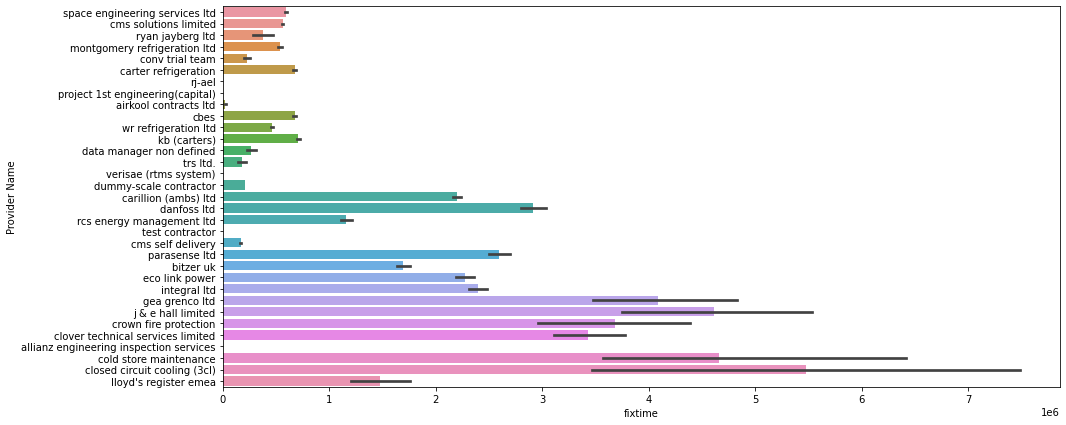

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.barplot(y='Provider Name', x='fixtime', data=df__)

In [ ]:
df_sna = df_alarms[df_alarms['Sales Sq. Ft.']!=0]

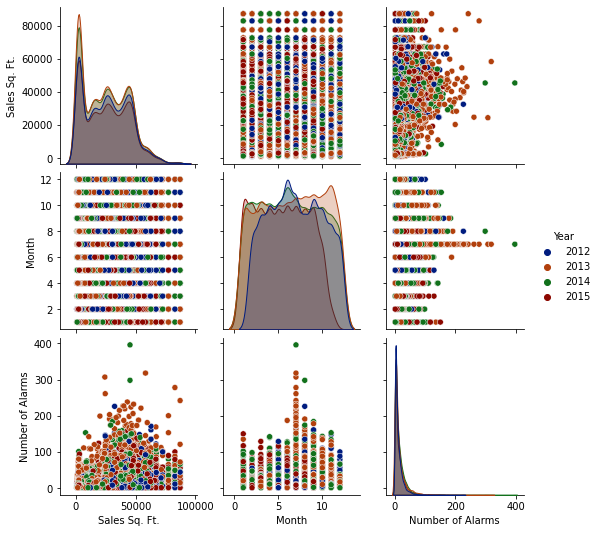

In [ ]:
sns.pairplot(data=df_sna, hue='Year', palette='dark')

In [ ]:
df_try = df_sna[['Sales Sq. Ft.', 'Number of Alarms']]

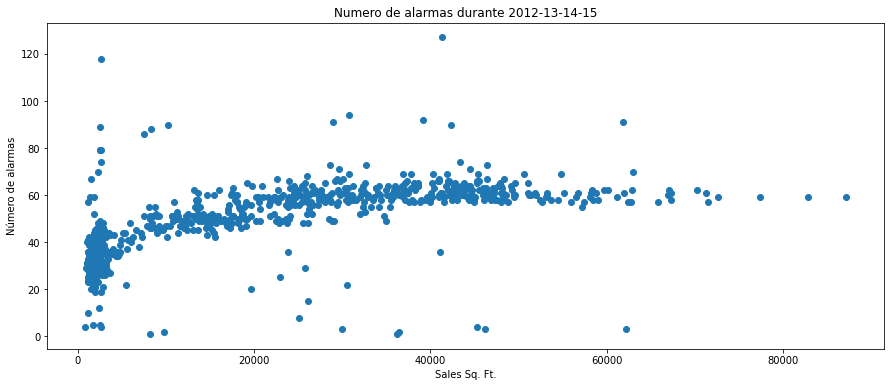

In [ ]:
total_alarms_per_size = df_try.groupby('Sales Sq. Ft.').count()['Number of Alarms'].to_numpy()
stores_size = df_try['Sales Sq. Ft.'].unique()
stores_size.sort()

plt.figure(figsize=(15, 6))
plt.scatter(stores_size, total_alarms_per_size)
plt.title('Numero de alarmas durante 2012-13-14-15')
plt.ylabel('Número de alarmas')
plt.xlabel('Sales Sq. Ft.')
plt.show()

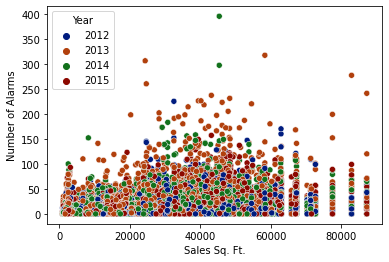

In [ ]:
sns.scatterplot(data=df_sna, y='Number of Alarms', x='Sales Sq. Ft.', hue='Year', palette='dark')